In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
data = pd.read_csv(r"C:\Users\Alex Sameri\Desktop\data_science_projects\Final Project Files\electricity.csv", low_memory = False)
data.head()

,DateTime,Holiday,HolidayFlag,DayOfWeek,WeekOfYear,Day,Month,Year,PeriodOfDay,ForecastWindProduction,SystemLoadEA,SMPEA,ORKTemperature,ORKWindspeed,CO2Intensity,ActualWindProduction,SystemLoadEP2,SMPEP2
0,01/11/2011 00:00,NaN,0,1,44,1,11,2011,0,315.31,3388.77,49.26,6.00,9.30,600.71,356.00,3159.60,54.32
1,01/11/2011 00:30,NaN,0,1,44,1,11,2011,1,321.80,3196.66,49.26,6.00,11.10,605.42,317.00,2973.01,54.23
2,01/11/2011 01:00,NaN,0,1,44,1,11,2011,2,328.57,3060.71,49.10,5.00,11.10,589.97,311.00,2834.00,54.23
3,01/11/2011 01:30,NaN,0,1,44,1,11,2011,3,335.60,2945.56,48.04,6.00,9.30,585.94,313.00,2725.99,53.47
4,01/11/2011 02:00,NaN,0,1,44,1,11,2011,4,342.90,2849.34,33.75,6.00,11.10,571.52,346.00,2655.64,39.87


In [7]:
data.dtypes

DateTime                  object
Holiday                   object
HolidayFlag                int64
DayOfWeek                  int64
WeekOfYear                 int64
Day                        int64
Month                      int64
Year                       int64
PeriodOfDay                int64
ForecastWindProduction    object
SystemLoadEA              object
SMPEA                     object
ORKTemperature            object
ORKWindspeed              object
CO2Intensity              object
ActualWindProduction      object
SystemLoadEP2             object
SMPEP2                    object
dtype: object

In [8]:
data_d = data.drop(columns = ['DateTime', 'Holiday'])

In [9]:
data_d.head()

,HolidayFlag,DayOfWeek,WeekOfYear,Day,Month,Year,PeriodOfDay,ForecastWindProduction,SystemLoadEA,SMPEA,ORKTemperature,ORKWindspeed,CO2Intensity,ActualWindProduction,SystemLoadEP2,SMPEP2
0,0,1,44,1,11,2011,0,315.31,3388.77,49.26,6.00,9.30,600.71,356.00,3159.60,54.32
1,0,1,44,1,11,2011,1,321.80,3196.66,49.26,6.00,11.10,605.42,317.00,2973.01,54.23
2,0,1,44,1,11,2011,2,328.57,3060.71,49.10,5.00,11.10,589.97,311.00,2834.00,54.23
3,0,1,44,1,11,2011,3,335.60,2945.56,48.04,6.00,9.30,585.94,313.00,2725.99,53.47
4,0,1,44,1,11,2011,4,342.90,2849.34,33.75,6.00,11.10,571.52,346.00,2655.64,39.87


In [10]:
data_d.isnull().sum()

HolidayFlag               0
DayOfWeek                 0
WeekOfYear                0
Day                       0
Month                     0
Year                      0
PeriodOfDay               0
ForecastWindProduction    0
SystemLoadEA              0
SMPEA                     0
ORKTemperature            0
ORKWindspeed              0
CO2Intensity              0
ActualWindProduction      0
SystemLoadEP2             0
SMPEP2                    0
dtype: int64

In [13]:
columns= ['ForecastWindProduction','SystemLoadEA', 'SMPEA', 'ORKTemperature', 'ORKWindspeed','CO2Intensity', 'ActualWindProduction', 'SystemLoadEP2', 'SMPEP2']
for cols in columns:
    data_d[cols] = pd.to_numeric(data_d[cols], errors='coerce')

In [14]:
data_d.dtypes

HolidayFlag                 int64
DayOfWeek                   int64
WeekOfYear                  int64
Day                         int64
Month                       int64
Year                        int64
PeriodOfDay                 int64
ForecastWindProduction    float64
SystemLoadEA              float64
SMPEA                     float64
ORKTemperature            float64
ORKWindspeed              float64
CO2Intensity              float64
ActualWindProduction      float64
SystemLoadEP2             float64
SMPEP2                    float64
dtype: object

In [15]:
data_d.isnull().sum()

HolidayFlag                 0
DayOfWeek                   0
WeekOfYear                  0
Day                         0
Month                       0
Year                        0
PeriodOfDay                 0
ForecastWindProduction      5
SystemLoadEA                2
SMPEA                       2
ORKTemperature            295
ORKWindspeed              299
CO2Intensity                7
ActualWindProduction        5
SystemLoadEP2               2
SMPEP2                      2
dtype: int64

In [16]:
data_f = data_d.dropna()

In [17]:
data_f.isnull().sum()

HolidayFlag               0
DayOfWeek                 0
WeekOfYear                0
Day                       0
Month                     0
Year                      0
PeriodOfDay               0
ForecastWindProduction    0
SystemLoadEA              0
SMPEA                     0
ORKTemperature            0
ORKWindspeed              0
CO2Intensity              0
ActualWindProduction      0
SystemLoadEP2             0
SMPEP2                    0
dtype: int64

In [21]:
numerical_cols = data_f.select_dtypes(include=[np.number]).columns
correlation_analysis = data_f[numerical_cols].corr()
correlation_analysis

,HolidayFlag,DayOfWeek,WeekOfYear,Day,Month,Year,PeriodOfDay,ForecastWindProduction,SystemLoadEA,SMPEA,ORKTemperature,ORKWindspeed,CO2Intensity,ActualWindProduction,SystemLoadEP2,SMPEP2
HolidayFlag,1.000000,-0.132555,-0.025538,0.030917,0.012688,-0.010826,0.001025,0.073655,-0.053758,0.003094,-0.096742,0.062964,-0.054537,0.065255,-0.077773,-0.001838
DayOfWeek,-0.132555,1.000000,0.008881,-0.004845,0.004288,0.000978,0.000328,-0.035666,-0.184712,-0.077541,-0.015850,-0.053902,0.029910,-0.032427,-0.190931,-0.069625
WeekOfYear,-0.025538,0.008881,1.000000,0.056717,0.970971,-0.234029,-0.000263,0.044062,-0.027475,-0.017929,0.155844,-0.028194,-0.093605,0.062363,-0.039600,-0.015814
Day,0.030917,-0.004845,0.056717,1.000000,0.004558,0.001404,0.000059,0.070681,-0.007528,-0.017830,0.014871,0.086643,-0.082226,0.060629,-0.026060,-0.012801
Month,0.012688,0.004288,0.970971,0.004558,1.000000,-0.233672,-0.000189,0.047053,-0.032178,-0.017667,0.150300,-0.028385,-0.104434,0.064416,-0.041150,-0.014918
Year,-0.010826,0.000978,-0.234029,0.001404,-0.233672,1.000000,0.000176,-0.045914,-0.081615,0.045147,0.079474,-0.013096,-0.192302,-0.064141,-0.059444,0.045456
PeriodOfDay,0.001025,0.000328,-0.000263,0.000059,-0.000189,0.000176,1.000000,0.034860,0.609273,0.356120,0.137944,0.088345,-0.177251,0.061086,0.594772,0.323490
ForecastWindProduction,0.073655,-0.035666,0.044062,0.070681,0.047053,-0.045914,0.034860,1.000000,0.177769,-0.046090,-0.172912,0.714234,-0.652286,0.953812,0.034687,-0.079639
SystemLoadEA,-0.053758,-0.184712,-0.027475,-0.007528,-0.032178,-0.081615,0.609273,0.177769,1.000000,0.532210,-0.086961,0.182608,-0.209947,0.200531,0.972738,0.491096
SMPEA,0.003094,-0.077541,-0.017929,-0.017830,-0.017667,0.045147,0.356120,-0.046090,0.532210,1.000000,0.018898,0.014079,-0.086420,-0.032218,0.534822,0.618158


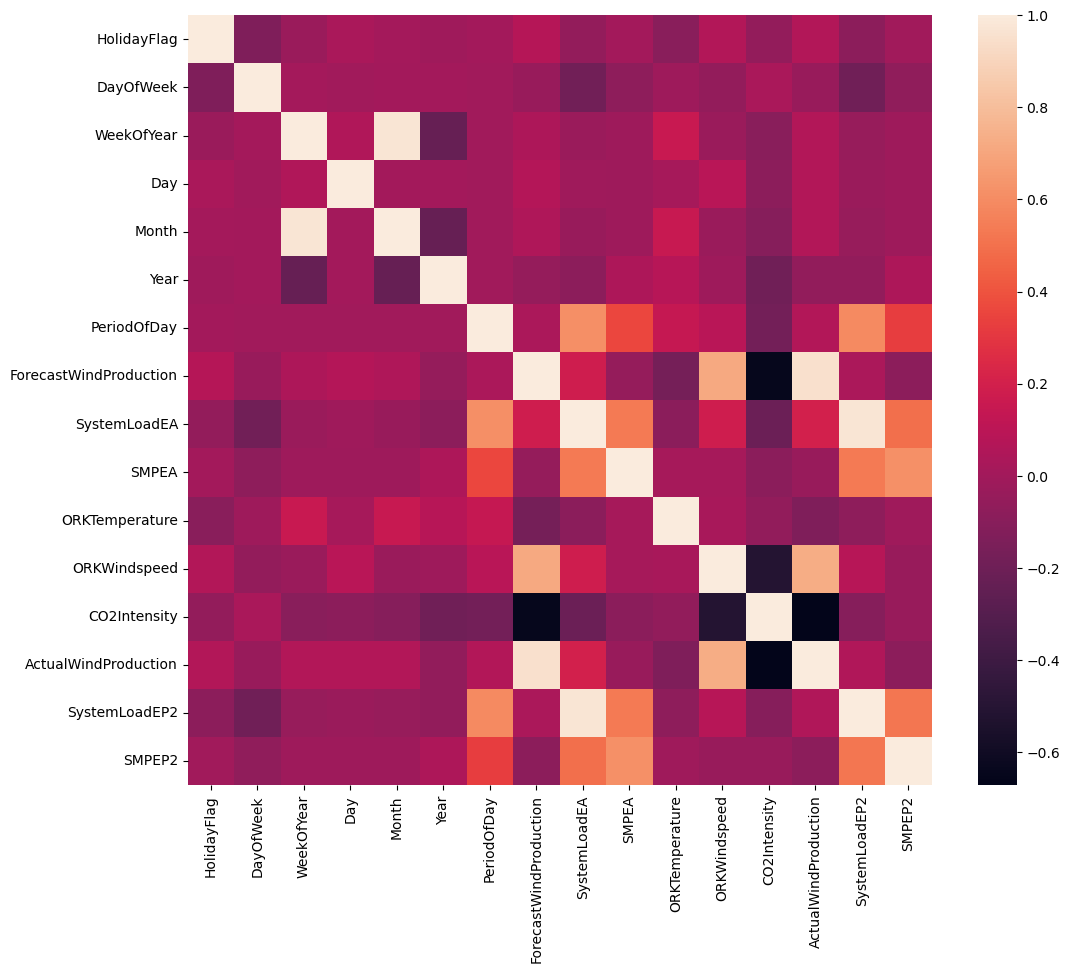

In [25]:
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_analysis)
plt.show()

In [32]:
x = data_f[['Day', 'Month', 'Year', 'PeriodOfDay', 'ForecastWindProduction', 'SystemLoadEA', 'ORKTemperature', 'CO2Intensity', 'ORKWindspeed', 'ActualWindProduction']]
y = data_f['SMPEA']

In [33]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.7)

In [37]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(x_train, y_train)

RandomForestRegressor()

In [39]:
pred = model.predict(x_test)
pred

array([126.0496,  44.3424,  43.7999, ...,  48.4656,  60.9168,  75.0775])

In [40]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, pred)

ValueError: continuous is not supported